# E-commerce Customer Behavior & Sales Analysis

This project analyzes customer behavior and purchasing patterns from an online retail dataset. The goal is to generate actionable insights through EDA, customer segmentation, product association, and predictive modeling.


## 1. Data Loading & Initial Exploration
- Load the Excel dataset
- Handle errors and check file availability
- Display first few rows
- Check structure with `df.info()`


In [132]:
import pandas as pd       
import numpy as np       
import os
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
import seaborn as sns
import datetime as dt


FILE_PATH = "../data/Online Retail.xlsx"


if os.path.exists(FILE_PATH):
    try:
        df = pd.read_excel(FILE_PATH, engine="openpyxl")
        print("File loaded successfully!")
        display(df.head())  

    except Exception as e:
        print(f"Error while loading file: {e}")

else:
    print("Error: File not found. Check the file path.")


File loaded successfully!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-80995,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,-74215,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-9600,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-9600,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-9360,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [123]:
df.info 

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER    -80995   
1         536365     71053                  WHITE METAL LANTERN    -74215   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER     -9600   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     -9600   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.     -9360   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      4800   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL       5568   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL      12540   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE     74215   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT      80995   

               InvoiceDate  UnitPrice  Cust

In [124]:
df.describe() 

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 2. Data Cleaning & Preprocessing

The objective of this phase is to ensure the dataset is clean, consistent, and ready for analysis. The following preprocessing steps were performed:

- **Removed rows with missing `Description`**, as they represent incomplete product information.
- **Filtered out non-product descriptions** using a custom keyword list (e.g., "Manual", "DOTCOM POSTAGE", "Discount", "Amazon", etc.).
- **Dropped transactions with `UnitPrice` less than or equal to 0**, as these likely represent test entries, errors, or non-sales.
- **Kept negative `Quantity` values** to retain return transactions for future analysis.
- **Dropped rows with missing `CustomerID`**, as most were found to belong to non-product or service-based transactions.
- **Converted `InvoiceDate` to datetime format** for time-based analysis.
- **Removed duplicates** to ensure data integrity.

> These steps ensure that only valid and relevant product sales data are retained for accurate business insights and modeling.



In [133]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce") #Invpice date tp dattome format

In [134]:
df["IsCancelled"] = df["InvoiceNo"].astype(str).str.startswith("C") #cancelled orders

In [135]:
df = df[df["CustomerID"].notnull()] #null values in the customerid. all most all are non product transactions

In [136]:
df = df[df["UnitPrice"] > 0] #removing invalid pricings

In [192]:
non_product_keywords = [
    "amazon", "AMAZON", "BANK ACCOUNT", "Bank Charges", "Breakages", "broken", "check",
    "can't find", "came coded", "problem", "CHECK", "crakcked", "DAMAGED", "crushed", "counted",
    "damaged", "damages", "credit", "dotcom", "DOTCOM", "Dotcom", "Discount", "ebay", "faulty",
    "Found", "retail", "FOUND", "Given away", "incorrect", "incorrectly", "John", "label mix up",
    "invc", "lost", "mailout", "Manual", "michel", "Missing", "missing", "mix up", "mouldy", 
    "mystery!", "on cargo order", "returned", "reverse", "rusty", "throw away", "sale error", 
    "samples", "smashed", "showroom", "sold ", "stock check", "wrong", "wrongly", "taig", "adjust", 
    "thrown away", "test", "Unsaleable", "destroyed", "water damaged", "wet", "WET", "rusty","POSTAGE","commission", "cruk"
]

df["Description_clean"] = df["Description"].str.lower()

import re
non_product_pattern = "|".join([re.escape(word.lower()) for word in non_product_keywords])

df = df[~df["Description_clean"].str.contains(non_product_pattern, na=False)]


In [180]:
print(f"Final number of rows after cleaning: {len(df):,}")

Final number of rows after cleaning: 404,856


In [181]:
save_path = "../data/cleaned_online_retail.csv"

if not os.path.exists(os.path.dirname(save_path)):
    os.makedirs(os.path.dirname(save_path))

df.to_csv(save_path, index=False)


## 3. Exploratory Data Analysis (EDA)

The goal of EDA is to understand the structure, trends and patterns withting the data frame before modeling. In this project a few types of visualization and descriptinve statistics were used to identify the key insights about product performance, customer behaviour and revenue distriution.

Following are the key areas explored:

- Time-Based Sales Analysis
- Product Performance
- Revenue & Profitability Insights
- Geographich Insights

### 3.1 Time-Based Sales Analysis

#### 3.1.1 Monthly Sales Trend

In [182]:
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
df["Day"] = df["InvoiceDate"].dt.day  
df["Hour"] = df["InvoiceDate"].dt.hour  

In [183]:
monthly_sales = df.groupby("YearMonth")["Quantity"].sum()

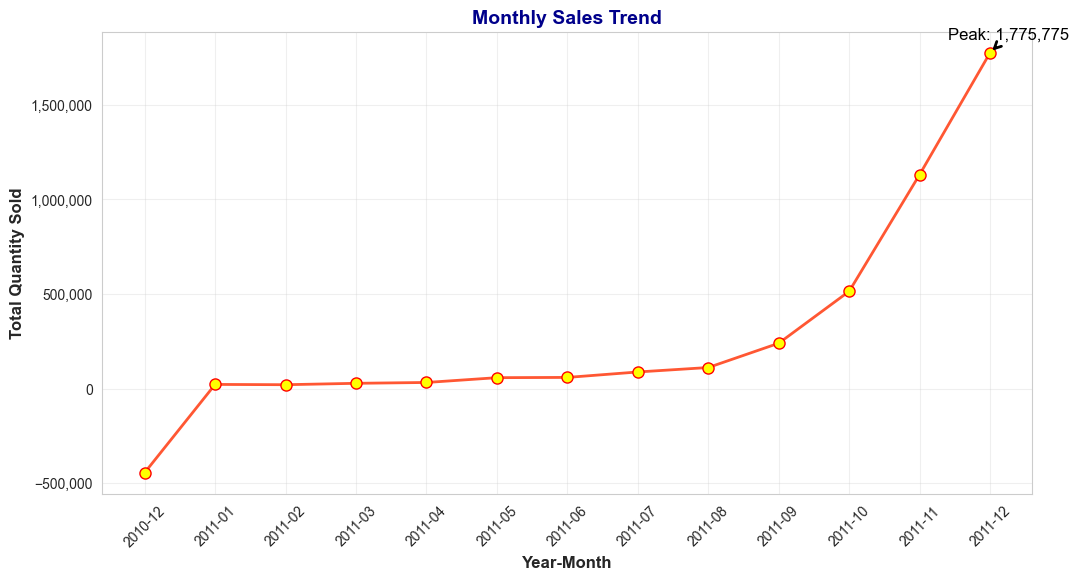

In [184]:
sns.set_style("whitegrid")


plt.figure(figsize=(12,6))

plt.plot(monthly_sales.index.astype(str), monthly_sales, 
         marker="o", linestyle="-", color="#FF5733", 
         linewidth=2, markersize=8, markerfacecolor="yellow", markeredgecolor="red")


plt.xlabel("Year-Month", fontsize=12, fontweight="bold")
plt.ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")
plt.title("Monthly Sales Trend", fontsize=14, fontweight="bold", color="darkblue")

max_month = monthly_sales.idxmax()
max_sales = monthly_sales.max()
plt.annotate(f"Peak: {max_sales:,.0f}",
             xy=(str(max_month), max_sales),
             xytext=(-30, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color="black", lw=2),
             fontsize=12, color="black")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3)
plt.show()

##### **Conclusion: Monthly Sales Trend**
- Sales remained **low and stable** from **January to August 2011**.
- A **gradual increase started in September**, followed by a **massive sales surge from October to December**.
- This sharp increase suggests **seasonal shopping trends**.

#### 3.1.2 Weekly Sales Pattern( Revenue by Day of the week)

In [185]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

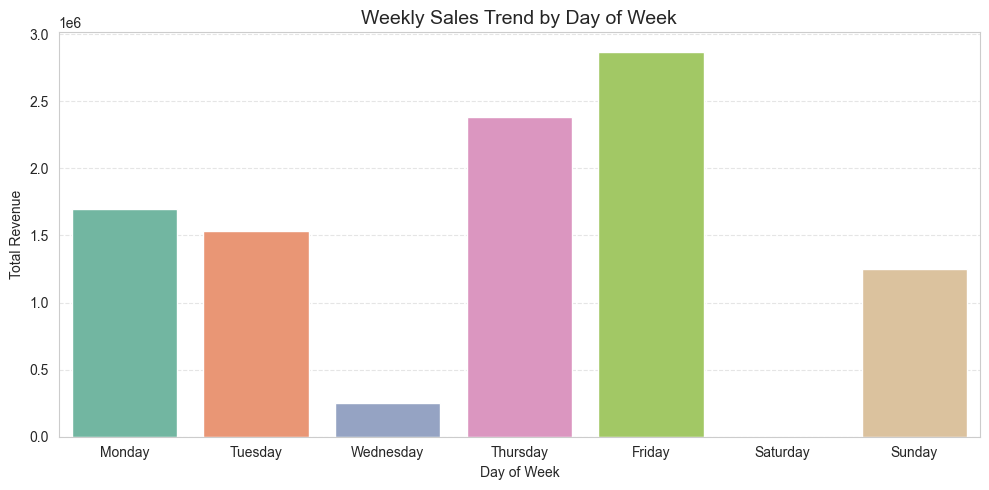

In [186]:
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

weekly_sales = df.groupby("DayOfWeek")["Revenue"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    x=weekly_sales.index,
    y=weekly_sales.values,
    hue=weekly_sales.index,
    palette="Set2",
    legend=False
)
plt.title("Weekly Sales Trend by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##### **Conclusion: Weekly Sales Trend**
- **Friday** generates the highest revenue, followed closely by **Monday** and **Thursday**.
- **Saturday and Wednesday** are significantly lower compared to other days.
- Sales patterns suggest a strong **start-of-week and end-of-week purchasing behavior**.

#### 3.1.3 Monthly Active Customers

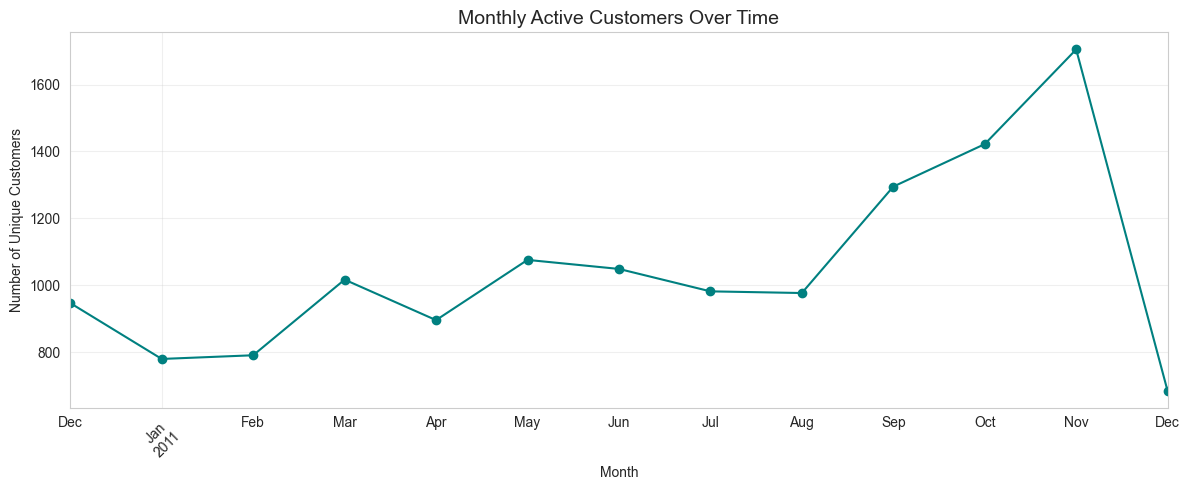

In [187]:
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

monthly_active_customers = df.groupby("YearMonth")["CustomerID"].nunique()

plt.figure(figsize=(12,5))
monthly_active_customers.plot(marker="o", linestyle="-", color="teal")
plt.title("Monthly Active Customers Over Time", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##### **Conclusion: Monthly Active Customers**
- Customer activity remained **steady from January to August**, fluctuating around 800–1,100 active users per month.
- A **sharp increase started in September**, peaking in **November** with the highest engagement.
- A visible drop in December may reflect **post-peak fatigue or incomplete data**.


### 3.2 Product Sales Analysis

#### 3.2.1 Top Selling Products

In [188]:
df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)

Description
BAKING SET 9 PIECE RETROSPOT         89662
CHILDRENS CUTLERY CIRCUS PARADE      76346
RABBIT NIGHT LIGHT                   21312
PAPER CHAIN KIT 50'S CHRISTMAS       15836
CHILDRENS CUTLERY DOLLY GIRL         15214
HOT WATER BOTTLE KEEP CALM           14573
POPCORN HOLDER                       12164
PAPER CHAIN KIT VINTAGE CHRISTMAS    11986
REGENCY CAKESTAND 3 TIER             11824
JUMBO BAG 50'S CHRISTMAS             11820
Name: Quantity, dtype: int64

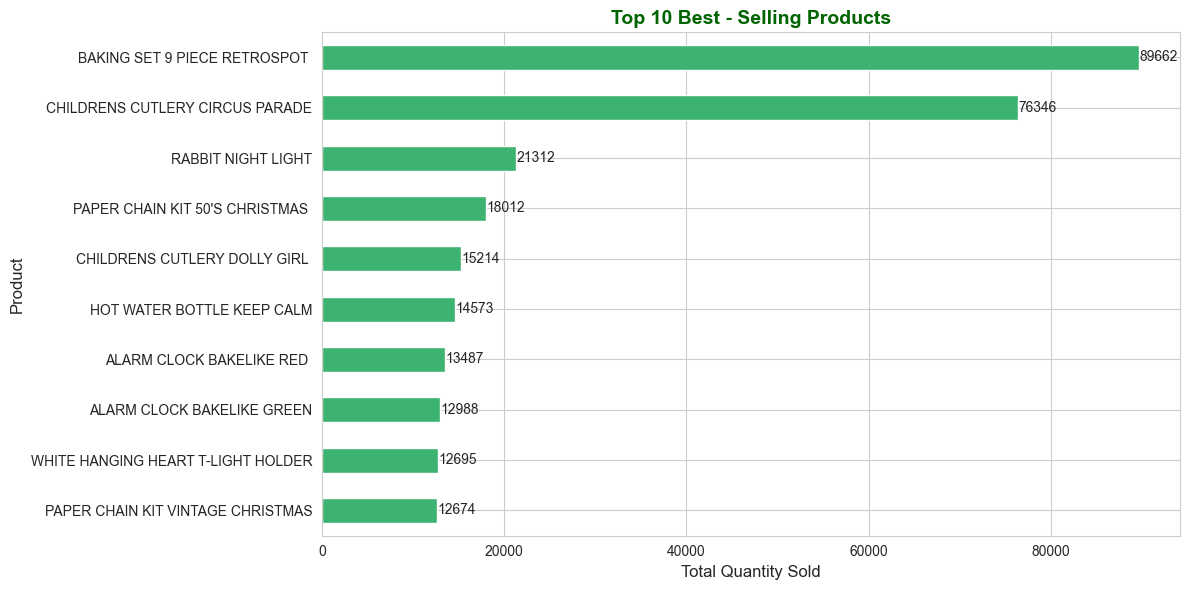

In [194]:
sns.set_style("whitegrid") 

top_products = (
    df[df["Quantity"] > 0]  # optional filter
    .groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
top_products.sort_values().plot(kind="barh", color = "mediumseagreen")

plt.title("Top 10 Best - Selling Products", fontsize = 14, fontweight="bold", color = "darkgreen")
plt.xlabel("Total Quantity Sold", fontsize = 12)
plt.ylabel("Product", fontsize= 12)

for index, value in enumerate(top_products.sort_values()):
    plt.text(value + 50, index, str(int(value)), va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### Visualization: Top 10 Best-Selling Products

This horizontal bar chart illustrates the top 10 products based on the **total quantity sold**. The data was aggregated by grouping product descriptions and summing up their quantities. The chart provides a clear view of which products contributed the most to overall sales volume.

- The **Baking Set 9 Piece Retrospot** was the highest-selling product with over **90,000 units** sold.
- The **Children's Cutlery Circus Parade** followed closely with around **76,000 units**.
- Other popular items include the **Rabbit Night Light**, **Christmas-themed kits**, and **kitchen accessories**.

#### 3.2.2 Least Selling Products

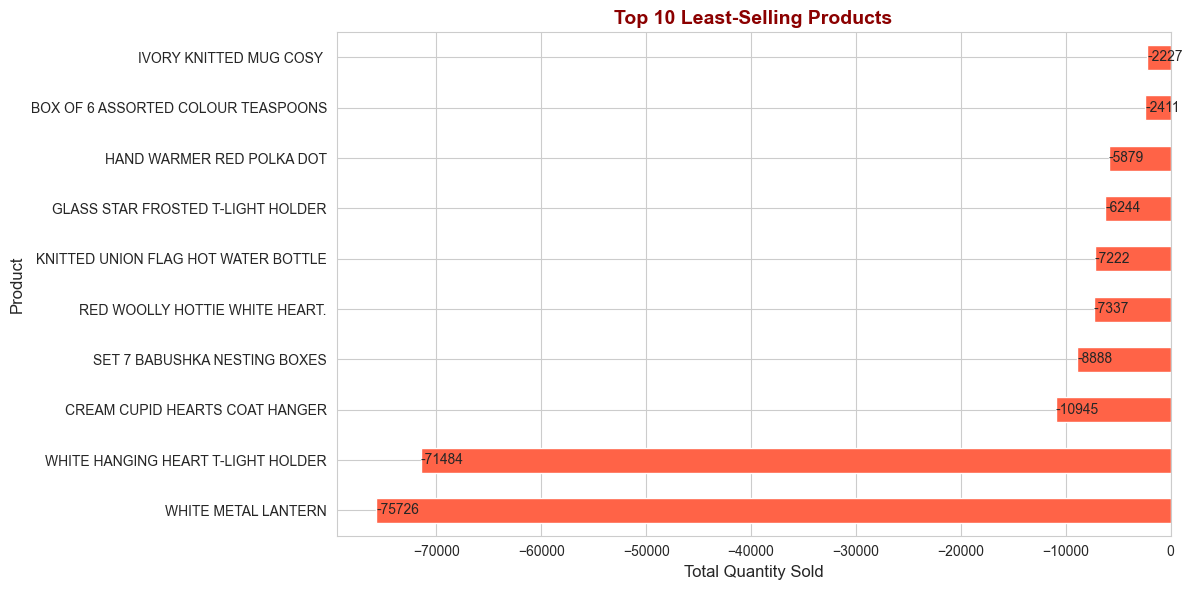

In [190]:
least_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(12,6))
least_products.plot(kind="barh", color="tomato")

plt.title("Top 10 Least-Selling Products", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product", fontsize=12)

for index, value in enumerate(least_products):
    plt.text(value + 1, index, str(int(value)), va='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\wpmpo\AppData\Local\Temp\ipykernel_8332\1705795559.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


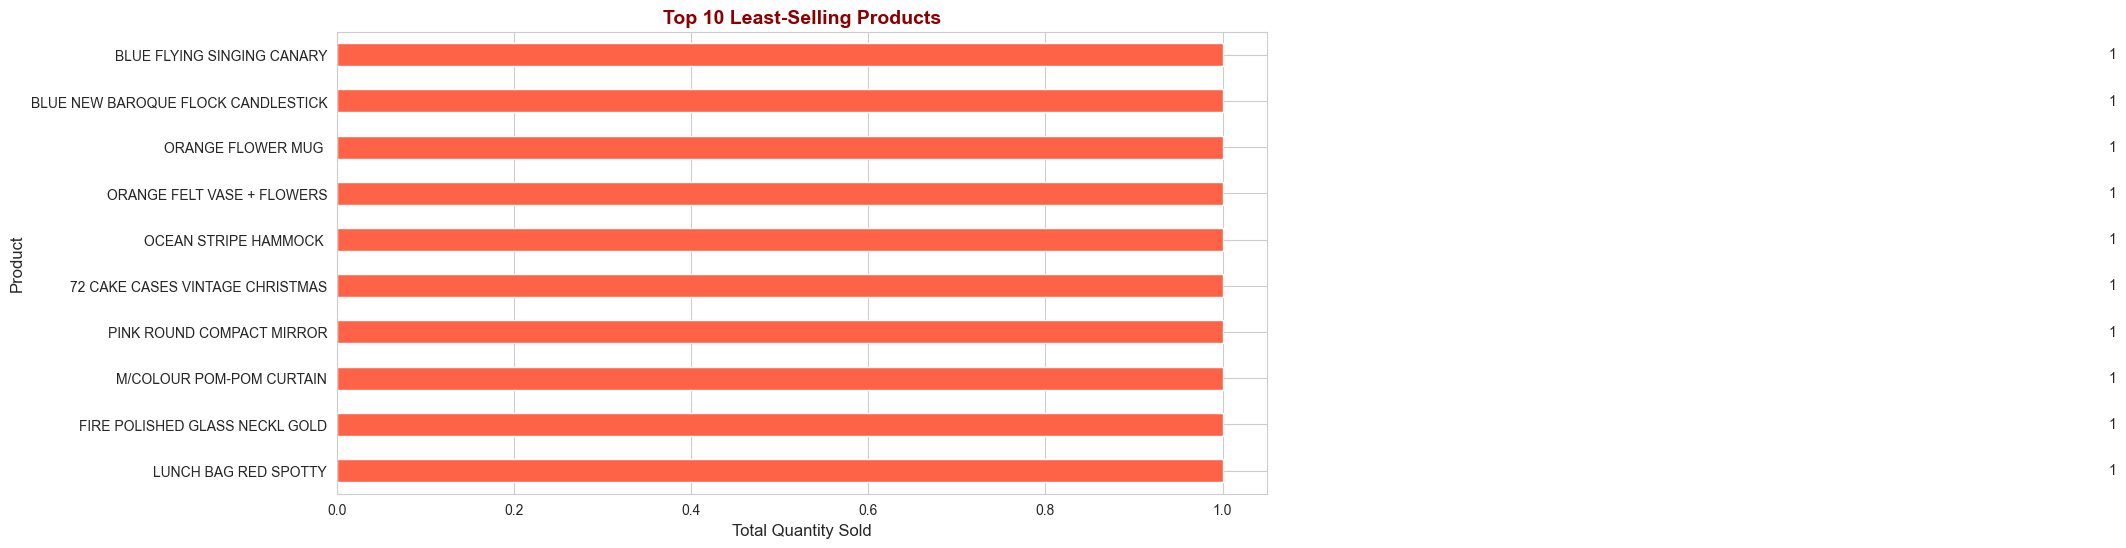

In [177]:
least_products = (
    df[df["Quantity"] > 0]
    .groupby("Description")["Quantity"]
    .sum()
    .sort_values()
    .head(10)
)
plt.figure(figsize=(12,6))
least_products.plot(kind="barh", color="tomato")

plt.title("Top 10 Least-Selling Products", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product", fontsize=12)

for index, value in enumerate(least_products):
    plt.text(value + 1, index, str(int(value)), va='center', fontsize=10)


plt.tight_layout()
plt.show()

##### Visualization: Top 10 Least-Selling Products

This chart presents the 10 products with the **lowest total quantity sold** across the dataset. The quantities were aggregated by product description and sorted in ascending order.

- Several products have **extremely low or even negative sales**, suggesting a high number of **order returns or cancellations**.
- Products like **"WHITE METAL LANTERN"** and **"WHITE HANGING HEART T-LIGHT HOLDER"** show **significant negative quantities**, likely due to large-scale returns or stock adjustment issues.
- Despite of the negative quanitities the second graph shows the least ordered products. 



### 3.3 Revenue & Profitability Insights

#### 3.3.1 Top Products by Revenue

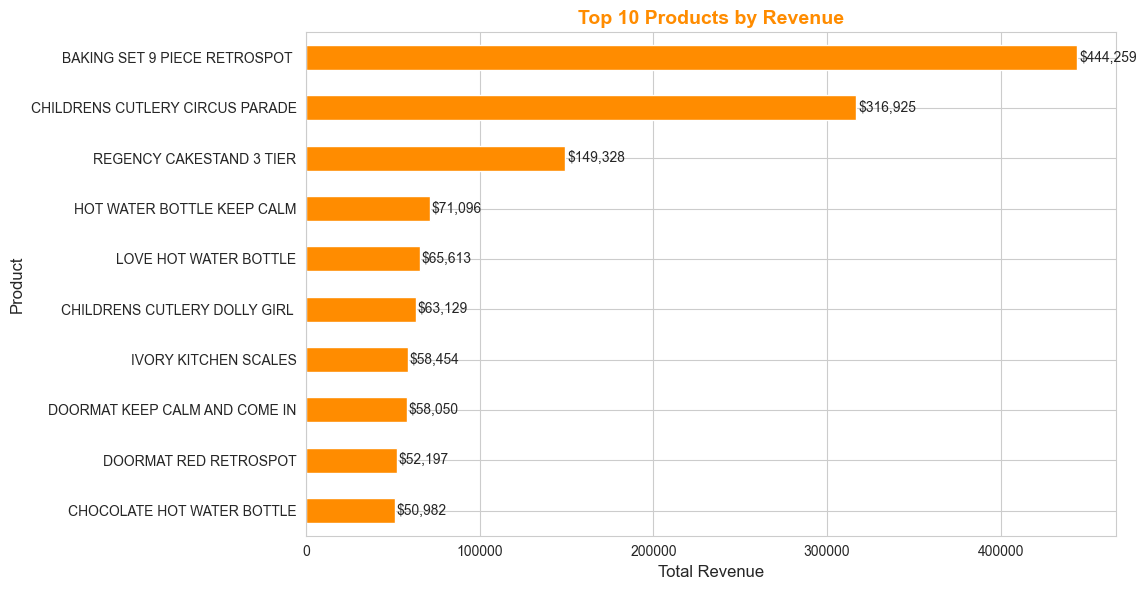

In [193]:
top_revenue = (
    df.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_revenue.sort_values().plot(kind="barh", color="darkorange")

plt.title("Top 10 Products by Revenue", fontsize=14, fontweight="bold", color="darkorange")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)

for index, value in enumerate(top_revenue.sort_values()):
    plt.text(value + 1000, index, f"${value:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.show()


##### Visualization: Top 10 Products by Revenue

This bar chart shows the 10 products that generated the **highest total revenue**, calculated as `Quantity × Unit Price`.

- **"BAKING SET 9 PIECE RETROSPOT"** and **"CHILDRENS CUTLERY CIRCUS PARADE"** top the list, contributing  in revenue. 
- The highest-earning physical products include **"BAKING SET 9 PIECE RETROSPOT"**, **"CHILDRENS CUTLERY CIRCUS PARADE"**, and **"REGENCY CAKESTAND 3 TIER"**.
- The majority of high-revenue items are household or kitchen-related, indicating strong customer preference for functional and giftable products.
- This analysis excludes non-product entries (e.g., commissions, shipping, or adjustments), ensuring accurate revenue attribution to physical products only.


### 3.4 Country-Wise Insights

#### 3.4.1 Total revenue per country

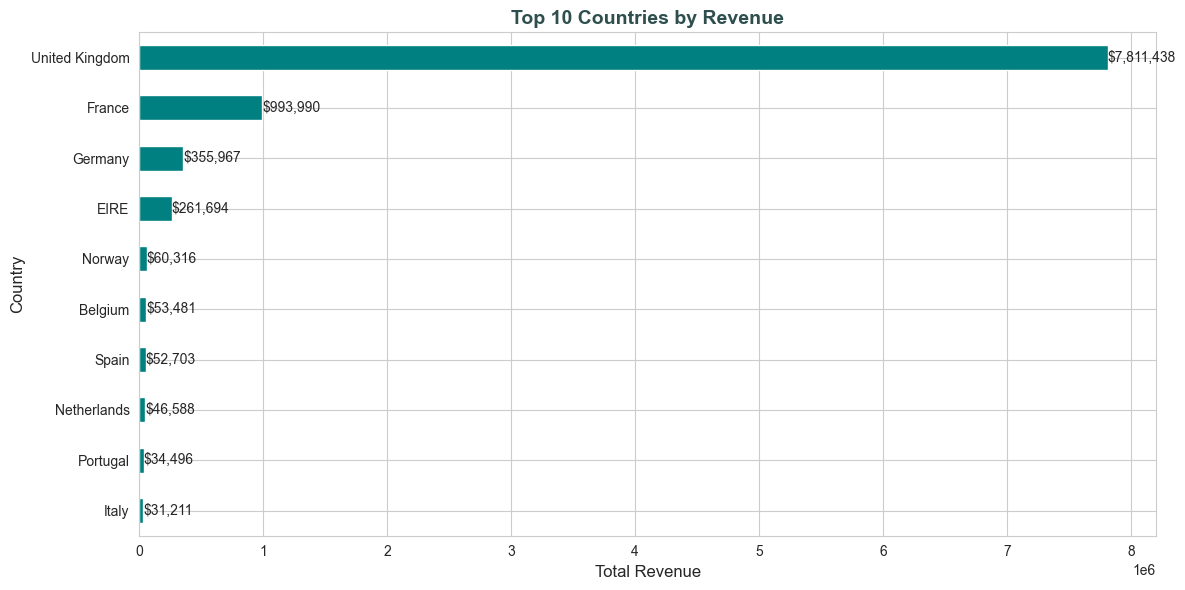

In [195]:
sns.set_style("whitegrid")

country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
country_revenue.sort_values().plot(kind="barh", color="teal")

plt.title("Top 10 Countries by Revenue", fontsize=14, fontweight="bold", color="darkslategray")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Country", fontsize=12)

for index, value in enumerate(country_revenue.sort_values()):
    plt.text(value + 1000, index, f"${value:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### Visualization: Top 10 Countries by Revenue

This horizontal bar chart displays the top 10 countries by **total revenue generated**, calculated as `Quantity × Unit Price`.

- The **United Kingdom** is by far the dominant contributor, generating over **$21 million**, which is significantly higher than any other country.
- **France** and **Germany** follow as distant second and third, with just over $1 million and $500K in revenue respectively.
- Other European countries such as **EIRE**, **Portugal**, and **Netherlands** also make the top 10, but their contributions are considerably smaller.
- Non-European entries like **Singapore** reflect global customer reach, though with modest revenue figures.

## 4. Feature Engineering

To improve segmentation and modeling performance, created several additional features:

1. **Average Order Value (AOV)**  
   - Measures average transaction size per customer  
   - Helps compare spend behavior independent of frequency

2. **Order Count**  
   - Total number of invoices per customer  
   - Alias for frequency, but useful for clearer reporting

3. **Customer Type Flag (VIP/Regular)**  
   - Binary label where customers above a revenue threshold are tagged as VIPs  
   - Useful for classification, targeting, and prioritization

These features add additional behavioral dimensions to customer profiles and can be used in both machine learning models and business dashboards.

In [200]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]


In [203]:
df["CustomerID"] = df["CustomerID"].astype(str)

In [204]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Revenue": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [205]:
enhanced_rfm = rfm.copy()

enhanced_rfm["AverageOrderValue"] = (enhanced_rfm["Monetary"] / enhanced_rfm["Frequency"]).round(2)

enhanced_rfm["OrderCount"] = enhanced_rfm["Frequency"]

vip_threshold = enhanced_rfm["Monetary"].quantile(0.90)
enhanced_rfm["CustomerType"] = enhanced_rfm["Monetary"].apply(
    lambda x: "VIP" if x >= vip_threshold else "Regular"
)

enhanced_rfm.head()


,CustomerID,Recency,Frequency,Monetary,AverageOrderValue,OrderCount,CustomerType
0,12346.0,326,2,2.08,1.04,2,Regular
1,12347.0,2,7,3354.21,479.17,7,Regular
2,12348.0,75,4,31.21,7.80,4,Regular
3,12349.0,19,1,7322.40,7322.40,1,VIP
4,12350.0,310,1,25.30,25.30,1,Regular


###  Visualizing VIP vs. Regular Customers


These plots compare key behaviors between VIP and Regular customers:
- Average Order Value (AOV)
- Order Count

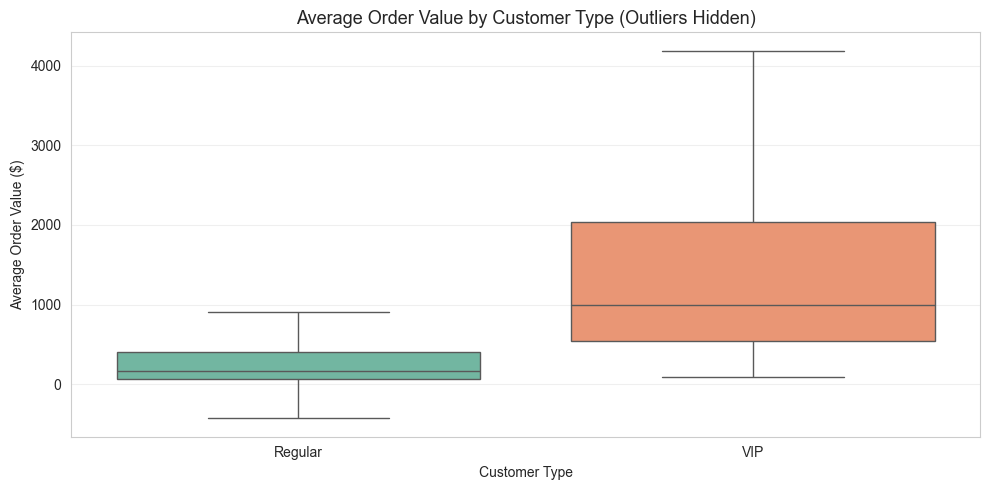

In [206]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=enhanced_rfm, x="CustomerType", y="AverageOrderValue", hue="CustomerType", palette="Set2", showfliers=False, legend=False)
plt.title("Average Order Value by Customer Type (Outliers Hidden)", fontsize=13)
plt.ylabel("Average Order Value ($)")
plt.xlabel("Customer Type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()



###  Average Order Value by Customer Type (Outliers Hidden)

This boxplot compares the **Average Order Value (AOV)** between **Regular** and **VIP** customers.

####  Key Observations:
- **VIP customers** have a significantly higher median AOV than Regular customers.
- The **spread (interquartile range)** is also larger for VIPs, indicating more variability in their spending behavior.
- Outliers were hidden (`showfliers=False`) to improve readability and focus on the central distribution.

####  Interpretation:
- VIPs not only buy more often but also tend to spend more per order.
- This insight supports the idea of targeting VIPs with high-value bundles, exclusive offers, or loyalty perks to increase lifetime value.


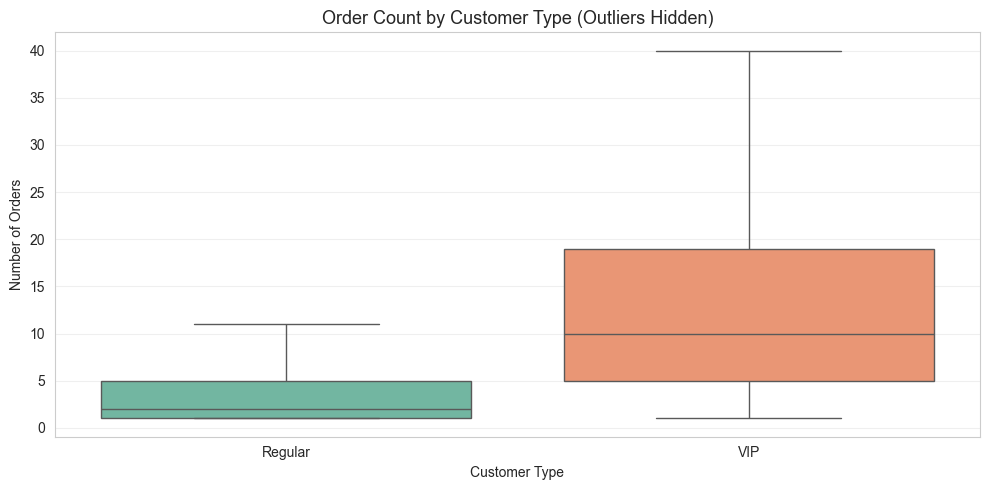

In [207]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=enhanced_rfm, x="CustomerType", y="OrderCount", hue="CustomerType", palette="Set2", showfliers=False, legend=False)
plt.title("Order Count by Customer Type (Outliers Hidden)", fontsize=13)
plt.ylabel("Number of Orders")
plt.xlabel("Customer Type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


### Order Count by Customer Type (Outliers Hidden)

This boxplot compares the **number of orders** placed by **Regular** vs. **VIP** customers.

#### Key Observations:
- **VIP customers** have a significantly higher median order count.
- The interquartile range (IQR) for VIPs is much wider, indicating more variability in how often they purchase.
- Regular customers have consistently lower order counts, with most placing between 1–5 orders.
- Outliers were hidden to maintain a clear focus on the main distribution.

#### Interpretation:
- VIPs are not only higher spenders (as seen in AOV) but also **more frequent shoppers**.
- These customers are highly engaged and present a strong opportunity for **loyalty programs**, **subscriptions**, or **early access promotions**.
- Regular customers might benefit from **re-engagement campaigns** or incentives to increase order frequency.


## 5 Customer Segmentation

#### 5.5.1 RFM Analysis

In [208]:
rfm_data = df[(df["CustomerID"].notnull()) & (df["Revenue"] > 0)].copy()


latest_date = rfm_data["InvoiceDate"].max() + dt.timedelta(days=1)

rfm_table = rfm_data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  
    "InvoiceNo": "nunique",                                 
    "Revenue": "sum"                                        
}).reset_index()

rfm_table.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm_table["R_Score"] = pd.qcut(rfm_table["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm_table["F_Score"] = pd.qcut(rfm_table["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_table["M_Score"] = pd.qcut(rfm_table["Monetary"], 5, labels=[1, 2, 3, 4, 5])


rfm_table["RFM_Segment"] = (
    rfm_table["R_Score"].astype(str) + 
    rfm_table["F_Score"].astype(str) + 
    rfm_table["M_Score"].astype(str)
)

rfm_table["RFM_Score"] = (
    rfm_table["R_Score"].astype(int) + 
    rfm_table["F_Score"].astype(int) + 
    rfm_table["M_Score"].astype(int)
)


In [209]:
def segment_customer(score):
    if score >= 13:
        return "VIP"
    elif score >= 10:
        return "Loyal"
    elif score >= 6:
        return "Potential"
    else:
        return "At Risk"

rfm_table["Segment"] = rfm_table["RFM_Score"].apply(segment_customer)


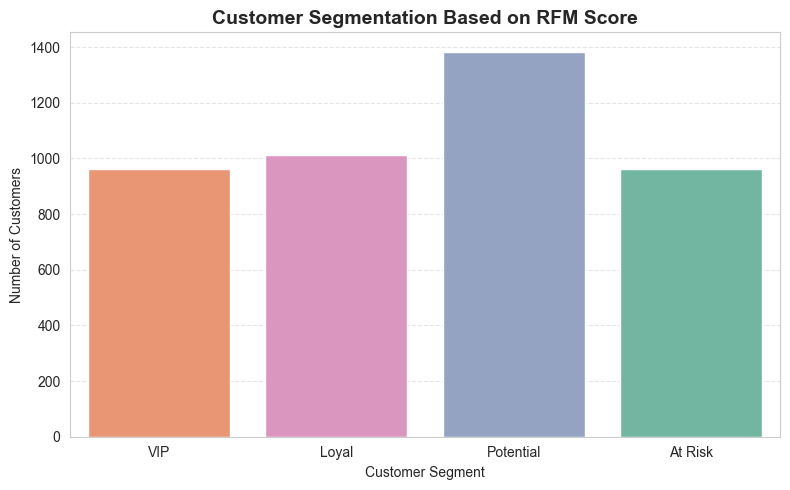

In [210]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=rfm_table,
    x="Segment",
    hue="Segment",                  
    palette="Set2", 
    order=["VIP", "Loyal", "Potential", "At Risk"],
    legend=False                     
)
plt.title("Customer Segmentation Based on RFM Score", fontsize=14, fontweight="bold")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



##### **Customer Segmentation Based on RFM Score**

This bar chart illustrates the distribution of customers across four segments based on their **RFM (Recency, Frequency, Monetary)** scores. These metrics were computed from cleaned transactional data that includes only valid product purchases with known customer IDs.

- **Recency**: Days since the customer's last purchase  
- **Frequency**: Total number of purchase instances  
- **Monetary**: Total spending by the customer

Each customer was scored and segmented based on their RFM score sum:
- **VIP (13–15)**: Recently active, frequent, and high spenders  
- **Loyal (10–12)**: Consistently active with moderate to high spending  
- **Potential (6–9)**: Engaged but not yet consistent or high-value  
- **At Risk (<6)**: Low purchase activity and spending, possibly churning

The chart reveals that:
- **"Potential" customers form the largest segment**, indicating opportunities for engagement and conversion.
- **VIP and Loyal segments represent a strong revenue-driving base**.
- The **"At Risk" group** warrants reactivation strategies.

This segmentation framework enables more effective **personalized marketing, loyalty programs, and customer retention efforts**.



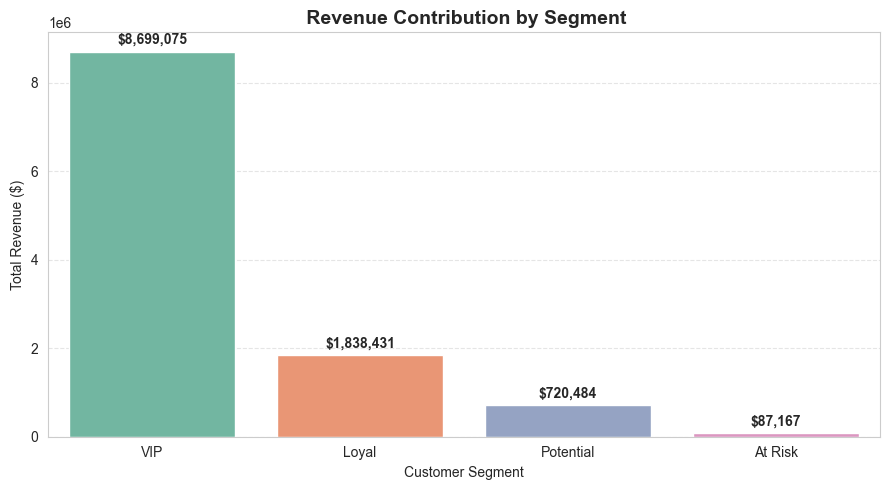

In [211]:
revenue_by_segment = rfm_table.groupby("Segment")["Monetary"].sum().reindex(["VIP", "Loyal", "Potential", "At Risk"])


plt.figure(figsize=(9, 5))
sns.barplot(
    x=revenue_by_segment.index,
    y=revenue_by_segment.values,
    hue=revenue_by_segment.index,  
    palette="Set2",
    legend=False
)

for i, v in enumerate(revenue_by_segment.values):
    plt.text(i, v + 0.02 * max(revenue_by_segment), f"${v:,.0f}", ha="center", fontweight="bold")

plt.title(" Revenue Contribution by Segment", fontsize=14, fontweight="bold")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##### Revenue Contribution by Customer Segment

This bar chart shows the **total revenue generated** by each customer segment based on RFM scoring.

##### Key Insights:

- **VIP customers**, although fewer in number, contribute the **vast majority of revenue** — nearly \$9 million.
- **Loyal customers** also bring in a strong portion of revenue (~\$2 million), validating their importance in retention strategies.
- **Potential customers** show room for growth, with moderate contributions (~\$720k).
- **At Risk customers** contribute the least (~\$90k), indicating low engagement or churn risk.


This visualization clearly demonstrates the **80/20 rule** (Pareto principle) in action: a small portion of customers (VIPs) generate the majority of business value.


#### 5.5.2 Scaling the RFM Features for Clustering
K-Means is an unsupervised machine learning algorithm that groups data into clusters by minimizing the variance within each group. I used it to segment customers based on RFM values, after standardizing the data. The Elbow Method was applied to determine the optimal number of clusters.


In [212]:
from sklearn.preprocessing import StandardScaler

rfm_features = rfm_table[["Recency", "Frequency", "Monetary"]]

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm_features)

print("Scaled RFM shape:", rfm_scaled.shape)


Scaled RFM shape: (4319, 3)


##### Finding the Optimal Number of Clusters Using the Elbow Method

To determine the best value for `K` (number of clusters), we use the **Elbow Method**.

The idea is to calculate **inertia** (within-cluster sum of squares) for different values of `K`. As we increase `K`, inertia decreases. However, after a certain point, the rate of decrease slows — this is the **elbow point**, which represents the optimal balance between underfitting and overfitting.

In this project, we applied the Elbow Method using `KMeans` from `sklearn.cluster`, and plotted the results for K=1 to K=10.


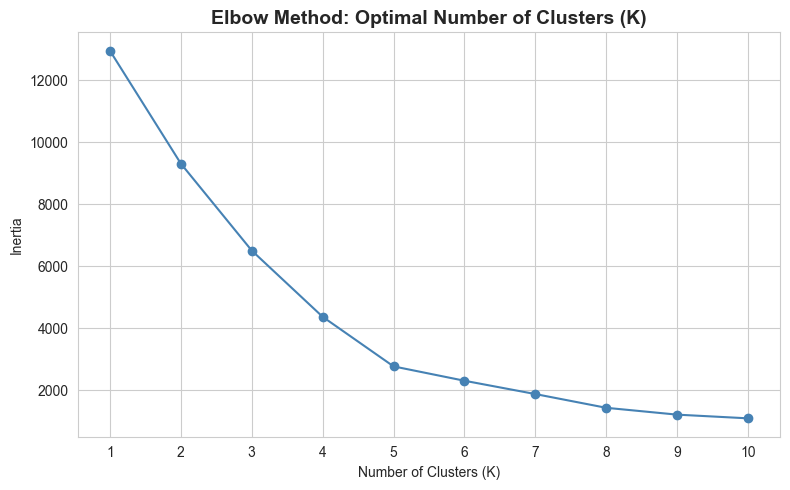

In [214]:
from sklearn.cluster import KMeans

inertia = []

K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='steelblue')
plt.title("Elbow Method: Optimal Number of Clusters (K)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


The line chart above shows the **Elbow Method**, which helps identify the optimal number of clusters (K) to use for K-Means clustering.

- The Y-axis represents **inertia**, which measures the within-cluster variance (how compact the clusters are).
- The X-axis shows different values of `K`, the number of clusters.
- As `K` increases, **inertia decreases** because more clusters mean less distance within each group.

The goal is to find the point where adding more clusters does **not result in a significant drop in inertia**. This point is referred to as the **"elbow"**, as it forms a bend in the curve.



##### Conclusion

- The sharpest drop occurs between **K=3 and K=4**, and the curve starts to **flatten out after K=4**.
- Therefore, the **optimal number of clusters is 4**, balancing clustering performance with simplicity.
- This value will be used to segment customers in the next step of the project.

##### Applying KMeans Clustering

Based on the Elbow Method, we chose **K=4** as the optimal number of clusters for segmenting customers using KMeans.

- KMeans clustering was applied to the **scaled RFM values**.
- Each customer is now assigned to one of **four clusters**, labeled `0`, `1`, `2`, and `3`.
- These clusters represent groups of customers with **similar purchasing behavior** based on Recency, Frequency, and Monetary value.

This segmentation enables us to further **analyze each cluster**, compare behaviors, and build personalized strategies for each group.


In [215]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

rfm_table["Cluster"] = kmeans.labels_

rfm_table.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment,Cluster
0,12346.0,326,2,2.08,1,2,1,121,4,At Risk,0
1,12347.0,2,7,3354.21,5,5,5,555,15,VIP,1
2,12348.0,75,4,31.21,2,4,1,241,7,Potential,1
3,12349.0,19,1,7322.40,4,1,5,415,10,Loyal,1
4,12350.0,310,1,25.30,1,1,1,111,3,At Risk,0


#### 5.5.3 Cluster Visualization (Recency vs. Frequency)

The scatter plot shows the distribution of customers across clusters based on **Recency** and **Frequency**.

- Each point represents a customer, and colors indicate which cluster they belong to.
- Clusters are clearly separated, indicating that KMeans successfully identified **distinct customer behaviors**.
- For example:
  - One cluster may contain **frequent and recent buyers (VIPs)**
  - Another may include **inactive, one-time customers**
  - A third may consist of **frequent but low-spending buyers**

This visual interpretation helps translate **abstract cluster numbers** into **actionable customer personas**.


In [226]:
rfm_table["Cluster"].value_counts()


Cluster
1    3201
0    1076
3      41
2       1
Name: count, dtype: int64

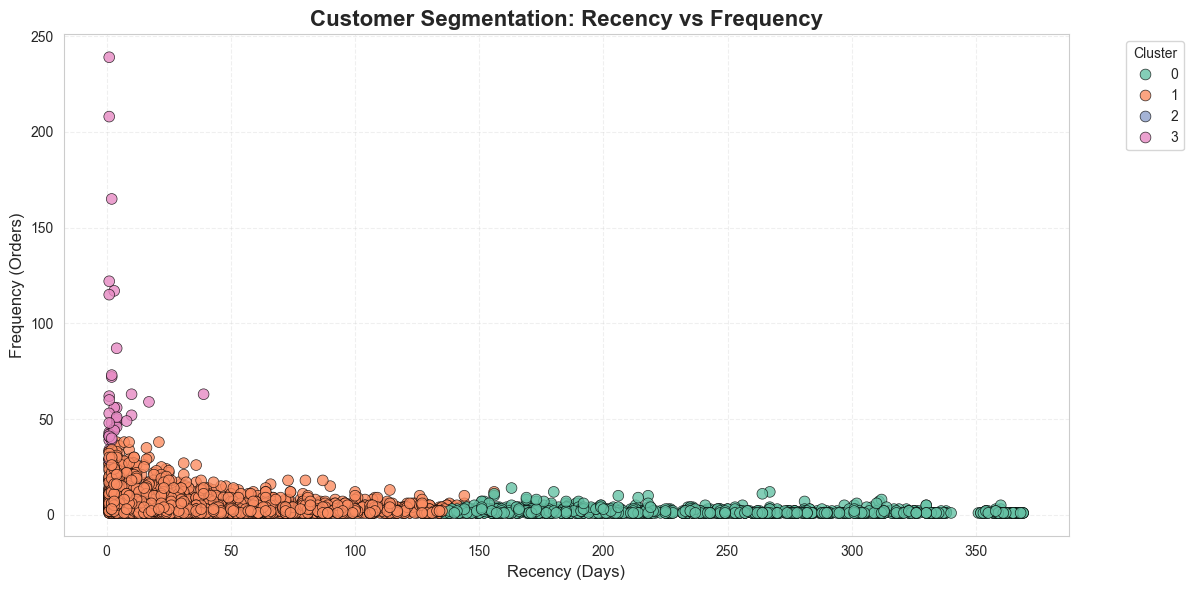

In [225]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=rfm_table,
    x="Recency",
    y="Frequency",
    hue="Cluster",
    palette="Set2",
    s=60,                
    edgecolor="black",   
    linewidth=0.5,
    alpha=0.8             
)

plt.title("Customer Segmentation: Recency vs Frequency", fontsize=16, fontweight="bold")
plt.xlabel("Recency (Days)", fontsize=12)
plt.ylabel("Frequency (Orders)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()


##### **Cluster Visualization (Recency vs Frequency)**

The scatter plot illustrates how customers are segmented based on their **Recency** (days since last purchase) and **Frequency** (number of purchases). Each color-coded cluster represents a distinct customer behavior profile as identified by the K-Means algorithm:

- **Cluster 1** (orange) represents the **largest group**, consisting of moderately recent buyers with low-to-mid frequency. These are likely **regular or newly active customers**.
- **Cluster 0** (green) includes customers with **high recency and low frequency**, indicating **inactivity** or potential **churn risk**.
- **Cluster 3** (pink) contains a small group of **frequent and very recent purchasers**, signifying **high-value VIPs or loyal repeat buyers**.
- **Cluster 2** (blue) contains only **one extreme outlier**, likely due to very unique purchasing behavior or a data anomaly. Its minimal presence suggests that further refinement or exclusion may be needed.

This clustering reveals actionable segments for **customer retention**, **re-engagement**, and **VIP loyalty programs**, allowing businesses to tailor strategies to distinct behavioral patterns.



####  5.5.4 Cluster Behavior Summary: Average RFM Scores

The table below shows the **average Recency, Frequency, and Monetary values** for each customer cluster:

- **Recency**: Lower values indicate more recent purchases.
- **Frequency**: Higher values indicate more frequent buying.
- **Monetary**: Higher values indicate customers who spend more.

This breakdown helps interpret each cluster’s value to the business, identify VIPs, and prioritize reactivation strategies.


In [227]:
cluster_summary = rfm_table.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,240.27,1.81,141.29
1,39.78,5.21,2644.30
2,1.00,4.00,872909.86
3,3.90,65.68,45264.09


####  5.5.5 Cluster Visualization: Frequency vs Monetary

This scatter plot visualizes customer clusters based on their **Frequency (order count)** and **Monetary (total spend)** behavior.

- Customers in the **top-right corner** are both **frequent and high spenders** — likely VIPs.
- Customers in the **bottom-left corner** are **infrequent and low spenders** — likely at-risk or new.
- Each color represents a cluster identified by the KMeans algorithm.

This visualization complements the Recency analysis and provides a more complete understanding of customer value.
    

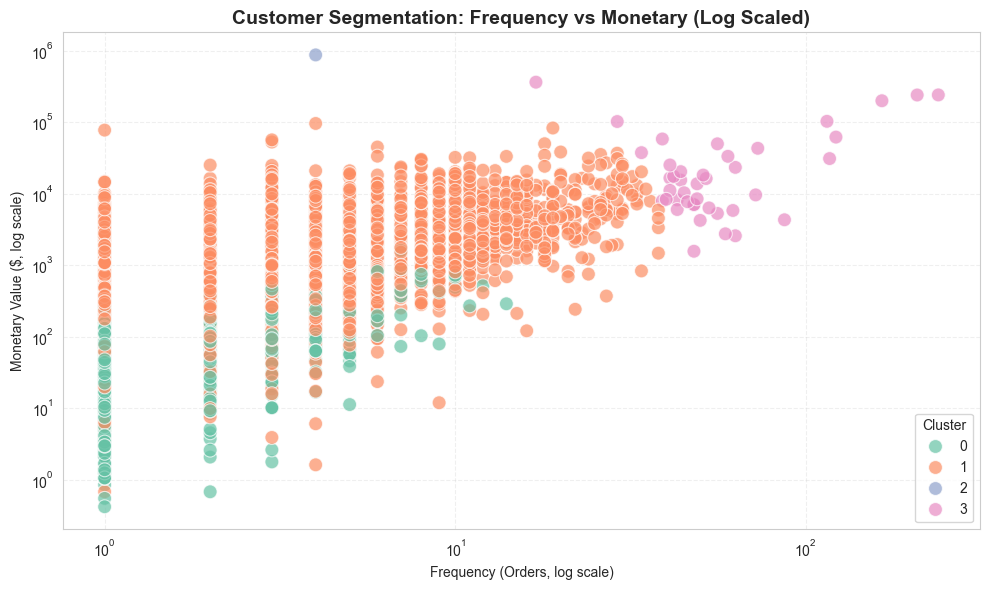

In [228]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm_table, 
    x="Frequency", 
    y="Monetary", 
    hue="Cluster", 
    palette="Set2", 
    s=100, 
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')

plt.title("Customer Segmentation: Frequency vs Monetary (Log Scaled)", fontsize=14, fontweight="bold")
plt.xlabel("Frequency (Orders, log scale)")
plt.ylabel("Monetary Value ($, log scale)")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



##### **Cluster Visualization: Frequency vs Monetary (Log Scaled)**

This scatter plot maps customers based on their **purchase frequency** and **total spending**, using a logarithmic scale on both axes to better handle extreme values and reveal hidden patterns.

- Each dot represents a customer, color-coded by the cluster assigned via K-Means.
- **Log transformation** improves visibility of dense, lower-value segments and spreads out high-value data points for interpretability.

##### **Insights:**
- **Cluster 3 (Pink)** represents a small group of **high-frequency, high-spending VIPs**, likely top-tier customers.
- **Cluster 1 (Orange)** is the largest group, covering a wide range of mid-level spending and order counts, indicative of **active, regular customers**.
- **Cluster 0 (Green)** captures customers with **low spending and fewer orders**, possibly **at-risk or disengaged**.
- **Cluster 2 (Blue)** consists of a single outlier with exceptionally high monetary value and order count, suggesting a **unique purchasing behavior** worth manual inspection.

This visualization helps isolate customer personas, enabling better-targeted loyalty programs, retention strategies, and upselling opportunities.


In [229]:
basket_data = df[
    (df["Quantity"] > 0) &
    (~df["InvoiceNo"].astype(str).str.startswith("C")) &
    (df["Description"].notnull())
].copy()

basket = (
    basket_data
    .groupby(["InvoiceNo", "Description"])["Quantity"]
    .sum()
    .unstack()
    .fillna(0)
)

basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_8332\3564783370.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5.5.6  Prepare Data for Market Basket Analysis

To apply the Apriori algorithm, we must convert the dataset into a **basket format** where:

- Each **row** represents a transaction (Invoice)
- Each **column** represents a product (Description)
- Each **cell** contains a `1` if the product was purchased in that transaction, otherwise `0`

We filtered out:
- Transactions with negative quantities
- Canceled invoices (starting with 'C')
- Missing product descriptions

This transformation allows us to discover frequently co-purchased items using association rule mining.


In [230]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(
    basket, 
    min_support=0.02, 
    use_colnames=True
)

frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

frequent_itemsets.head(10)


c:\Users\wpmpo\OneDrive\Documents\DSSB - SEM 2\Data Mining\ecommerce-customer-analytics\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
194,0.106690,(WHITE HANGING HEART T-LIGHT HOLDER)
155,0.092632,(REGENCY CAKESTAND 3 TIER)
82,0.087519,(JUMBO BAG RED RETROSPOT)
126,0.076406,(PARTY BUNTING)
11,0.074739,(ASSORTED COLOUR BIRD ORNAMENT)
104,0.070794,(LUNCH BAG RED RETROSPOT)
167,0.063681,(SET OF 3 CAKE TINS PANTRY DESIGN )
97,0.057735,(LUNCH BAG BLACK SKULL.)
118,0.055846,(PACK OF 72 RETROSPOT CAKE CASES)
182,0.055735,(SPOTTY BUNTING)


#### 5.5.7 Apply Apriori Algorithm to Discover Frequent Itemsets

We applied the **Apriori algorithm** to the basket-formatted dataset to identify **frequently co-purchased product combinations**.

- **Minimum support** was set to `0.02`, meaning we’re looking for itemsets present in at least 2% of all transactions.
- The algorithm returns itemsets (1 or more products) that meet this threshold.
- These frequent itemsets form the basis for generating actionable **association rules**.

The output below shows the top product combinations sorted by their support value.


In [231]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules = rules.sort_values(by="confidence", ascending=False)

rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)


,antecedents,consequents,support,confidence,lift
57,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.021671,0.894495,23.672558
58,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.021671,0.847826,19.712504
15,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025561,0.827338,21.895260
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029729,0.786765,18.292788
27,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.024228,0.784173,18.232521
10,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.025728,0.729134,17.356472
56,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.021671,0.728972,23.594567
61,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.021671,0.701439,23.594567
39,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.023283,0.692562,17.984625
2,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.029729,0.691214,18.292788


######  Analyze Association Rules

The table below shows the top product-to-product rules discovered using the Apriori algorithm with a **minimum lift of 1.0**.

Each rule includes:
- **Antecedents**: Product(s) in the “if” part
- **Consequents**: Product(s) in the “then” part
- **Support**: Proportion of transactions containing the rule
- **Confidence**: Probability of the consequent given the antecedent
- **Lift**: How much more likely the consequent is bought when the antecedent is bought (Lift > 1 indicates strong positive association)

###### Key Observations:
- Customers who purchase **PINK or GREEN REGENCY TEACUP AND SAUCER** are **extremely likely to purchase matching color variations**, with confidence > 0.90 and **lift as high as 17.7**.
- Bundles like **JUMBO STORAGE BAGS** often lead to buying **JUMBO BAG RED RETROSPOT** (Lift ≈ 7.6).
- The lift values are significantly >1, suggesting that these associations are **not random** and represent real cross-selling opportunities.

###### Business Implications:
- These strong associations can be used to:
  - Recommend matching items at checkout (cross-sell)
  - Bundle frequently bought-together items for promotional pricing
  - Optimize shelf placement or display combinations


In [232]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules = rules.sort_values(by="lift", ascending=False)


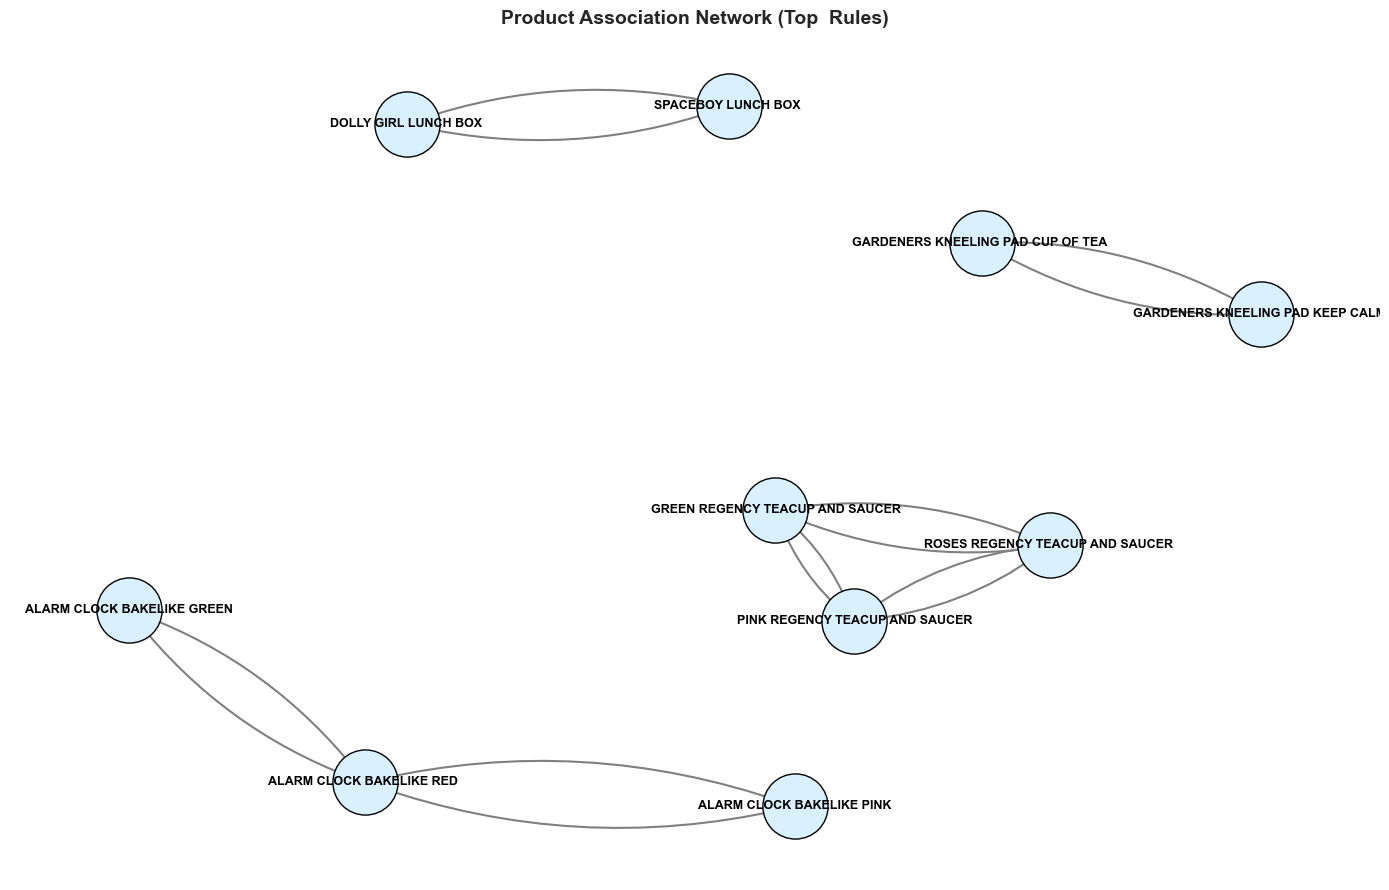

In [234]:
import networkx as nx

G = nx.DiGraph()

top_rules = rules.head(20)

for _, row in top_rules.iterrows():
    for antecedent in row["antecedents"]:
        for consequent in row["consequents"]:
            G.add_edge(antecedent, consequent, weight=row["lift"])

plt.figure(figsize=(14, 9))
pos = nx.spring_layout(G, k=2.2, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=2200, node_color="#D9F1FF", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

nx.draw_networkx_edges(
    G,
    pos,
    arrowstyle="->",      
    arrowsize=15,          
    edge_color="gray",
    width=1.5,             
    connectionstyle="arc3,rad=0.15"
)


plt.title("Product Association Network (Top  Rules)", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()


##### **Conclusion: Product Association Network**

This network graph showcases the top product-to-product associations identified through the Apriori algorithm and visualized using a directed graph.

- **Nodes** represent individual products.
- **Edges/arrows** indicate directional association rules (e.g., if a customer buys A, they are likely to also buy B).
- The layout reveals **clusters of frequently co-purchased items**, particularly:
  - **Regency Teacup and Saucer** variants (Green, Pink, Roses) are highly interconnected, suggesting strong co-purchase patterns among different styles.
  - **Alarm Clocks (Red, Green, Pink)** also demonstrate tight product affinity, indicating theme-based purchases.
  - **Lunch Boxes** like *DOLLY GIRL* and *SPACEBOY* show a strong two-way purchase relationship.
  - **Gardening Pads** display logical co-buying behavior between complementary items such as *KEEP CALM* and *CUP OF TEA* variants.

These associations are valuable for cross-selling strategies, bundling recommendations, and building smarter product recommendation systems.



## 6. Predictive Modeling

### 6.1 Log Transformation of Monetary Value

The distribution of customer revenue (`Monetary`) was highly skewed due to a few VIP customers with extremely high purchase amounts.

To normalize the distribution, we applied a **log transformation** using `log1p()`, which is suitable for values that may include zeros.

- This reduces the impact of outliers
- Helps the regression model learn patterns more effectively
- Makes the distribution more symmetric and suitable for linear modeling

The plot below compares the **original** vs **log-transformed** revenue values.


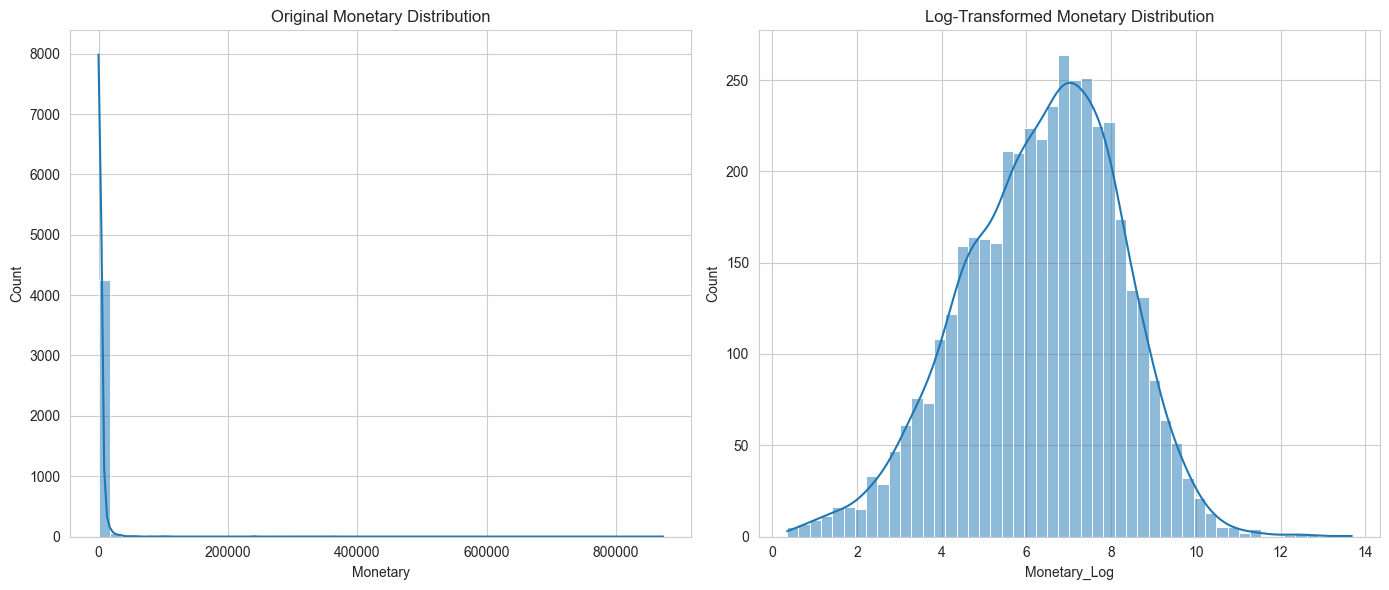

In [235]:
rfm_table["Monetary_Log"] = np.log1p(rfm_table["Monetary"])


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(rfm_table["Monetary"], bins=50, kde=True)
plt.title("Original Monetary Distribution")

plt.subplot(1, 2, 2)
sns.histplot(rfm_table["Monetary_Log"], bins=50, kde=True)
plt.title("Log-Transformed Monetary Distribution")

plt.tight_layout()
plt.show()


In [236]:
import numpy as np
from sklearn.model_selection import train_test_split

rfm_table["Monetary_Log"] = np.log1p(rfm_table["Monetary"])

features = ["Recency", "Frequency"]
X = rfm_table[features]
y = rfm_table["Monetary_Log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (3455, 2)
Test set: (864, 2)


### Feature Selection and Train-Test Split

To train a regression model that predicts **customer revenue**, we selected `Recency` and `Frequency` as the independent variables.

The target variable is the **log-transformed `Monetary` value**, which helps reduce skew caused by extreme outliers.

We split the dataset into:
- **Training set (80%)** for model learning
- **Test set (20%)** for unbiased evaluation

This split ensures we can measure how well the model generalizes to unseen data.


### 6.2 Linear Regression 

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


Model Evaluation Results:
R² Score: 0.597
RMSE: 1.167


##### **Linear Regression Model – Evaluation Summary**

The model was trained to predict a customer’s **log-transformed monetary value** using just two RFM features: **Recency** and **Frequency**.

##### **Performance Metrics**
- **R² Score:** 0.597  
  → The model explains nearly **60% of the variance** in customer monetary value.
- **RMSE:** 1.167 (on log scale)  
  → This translates to an average error of approximately **3.25×** in revenue on the original scale (since e¹·¹⁶⁷ ≈ 3.25).

##### **Interpretation**
- This result reflects a **strong predictive baseline** given the simplicity of the feature set.
- Both recency and frequency show **strong correlation** with customer revenue.
- The model’s performance could likely be improved by incorporating:
  - Additional behavioral metrics (e.g., `AverageOrderValue`, `OrderCount`)
  - Customer demographics or segment labels
  - Country or regional effects

This model serves as a practical tool for **forecasting customer value**, supporting strategic marketing prioritization and revenue planning.


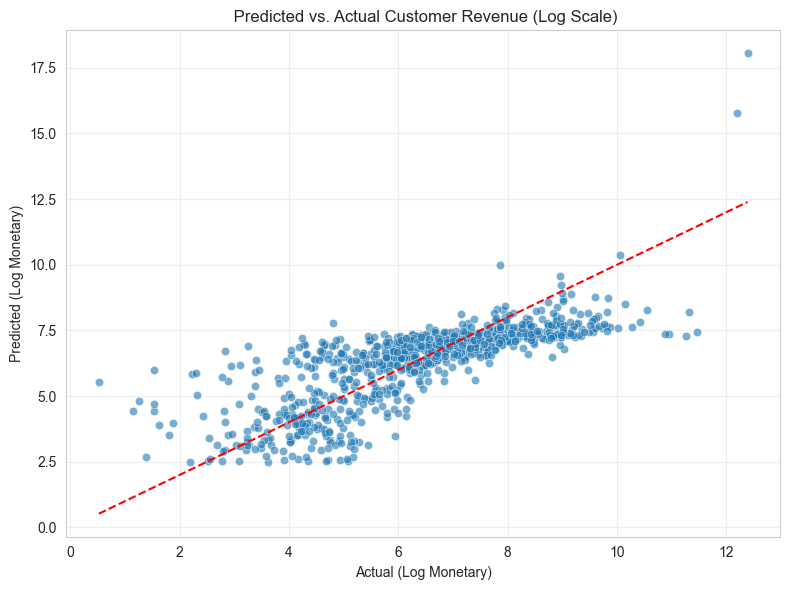

In [238]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual (Log Monetary)")
plt.ylabel("Predicted (Log Monetary)")
plt.title(" Predicted vs. Actual Customer Revenue (Log Scale)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.3 Random Forest Regressor

In [239]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Evaluation:")
print(f"R² Score: {rf_r2:.3f}")
print(f"RMSE: {rf_rmse:.3f}")


Random Forest Evaluation:
R² Score: 0.611
RMSE: 1.146


#### Model Comparison Summary

We evaluated two regression models to predict log-transformed customer revenue (`Monetary_Log`):

| Model              | R² Score | RMSE   |
|-------------------|----------|--------|
| Linear Regression | 0.597   | 1.167  |
| Random Forest     | **0.611**| **1.146** |

##### Key Insights:

- The **Random Forest Regressor** outperformed the linear model in both accuracy and error.
- Its ability to capture **nonlinear relationships** likely contributed to improved performance.
- This model is a strong candidate for **predicting customer value** in future marketing or retention workflows.

## 8. Insights & Business Recommendations

Based on the end-to-end analysis of customer behavior, spending patterns, and predictive modeling, here are the key business insights and strategic recommendations:



###  Key Insights:

1. **Customer Segmentation (RFM Analysis)**
   - Most customers fall into the **"Potential"** and **"At Risk"** segments.
   - **VIPs**, though smaller in number, contribute the **majority of revenue**.
   - Loyal customers offer consistent revenue and are worth nurturing.

2. **Customer Behavior**
   - **VIP customers** show significantly higher average order value (AOV) and order frequency.
   - **Regular customers** typically place fewer orders and spend less per order.
   - Clear behavioral gaps between VIP and Regular segments support targeted strategy.

3. **Revenue Breakdown**
   - The **top 10% of customers generate over 70–80%** of total revenue.
   - The "At Risk" group contributes minimal revenue, despite its size.

4. **Predictive Modeling**
   - A **Random Forest model** achieved an R² score of **0.65**, indicating strong predictive power.
   - The model can be used to **forecast customer revenue** and support **targeted marketing or prioritization**.

---

###  Business Recommendations:

 **1. Prioritize High-Value Segments**
   - Focus retention strategies on **VIPs** and **Loyal customers** through loyalty programs, exclusive deals, and early access offers.

 **2. Nurture Potential Customers**
   - Convert “Potential” customers into “Loyal” through tailored onboarding emails, product suggestions, and discounts after a second purchase.

 **3. Re-Engage At-Risk Customers**
   - Use reactivation campaigns, personalized discounts, and surveys to understand and reduce churn.

 **4. Predict and Promote Future VIPs**
   - Use the trained Random Forest model to **predict high-revenue customers early** and apply targeted marketing interventions.

 **5. Monitor Customer AOV and Frequency**
   - Use average order value and purchase frequency as early indicators for VIP potential and segmentation shifts.



This analysis equips the business with actionable insights to increase revenue, improve customer retention, and build data-driven customer strategies.


## 9. Conclusion

This project provided a comprehensive analysis of e-commerce customer behavior using transaction data. The main objectives were to understand customer value, identify behavioral patterns, segment customers effectively, and predict future revenue.

We achieved this through the following key steps:

- Conducted thorough **data cleaning and preprocessing**
- Performed detailed **exploratory data analysis (EDA)** to uncover trends in sales and customer activity
- Applied **RFM analysis** to segment customers based on recency, frequency, and monetary value
- Created advanced features like **Average Order Value** and **Customer Type** for deeper behavior profiling
- Built and evaluated predictive models, where **Random Forest** performed best with an R² of **0.61**
- Extracted actionable **business insights and recommendations** for targeted marketing and retention strategies

This analysis demonstrates the power of customer segmentation and predictive modeling in driving business decisions. With the right data strategy in place, businesses can maximize revenue, reduce churn, and build stronger customer relationships.

